# Portfolio for SDSPhD20 - Elisabeth

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* "supervised machine learning with penguins".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [67]:
# standard packaging

import pandas as pd
import seaborn as sns
import numpy as np #Numpy for linear algebra & co
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

#### 1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
#### 2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data

In [25]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [28]:
print(penguins.isnull())

     species_short  island  culmen_length_mm  culmen_depth_mm  \
0            False   False             False            False   
1            False   False             False            False   
2            False   False             False            False   
3            False   False              True             True   
4            False   False             False            False   
..             ...     ...               ...              ...   
339          False   False              True             True   
340          False   False             False            False   
341          False   False             False            False   
342          False   False             False            False   
343          False   False             False            False   

     flipper_length_mm  body_mass_g    sex  
0                False        False  False  
1                False        False  False  
2                False        False  False  
3                 True         True   T

In [29]:
# dropping missing values
data = penguins.dropna()

In [31]:
data.head(10)

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [32]:
data.shape

(334, 7)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [35]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


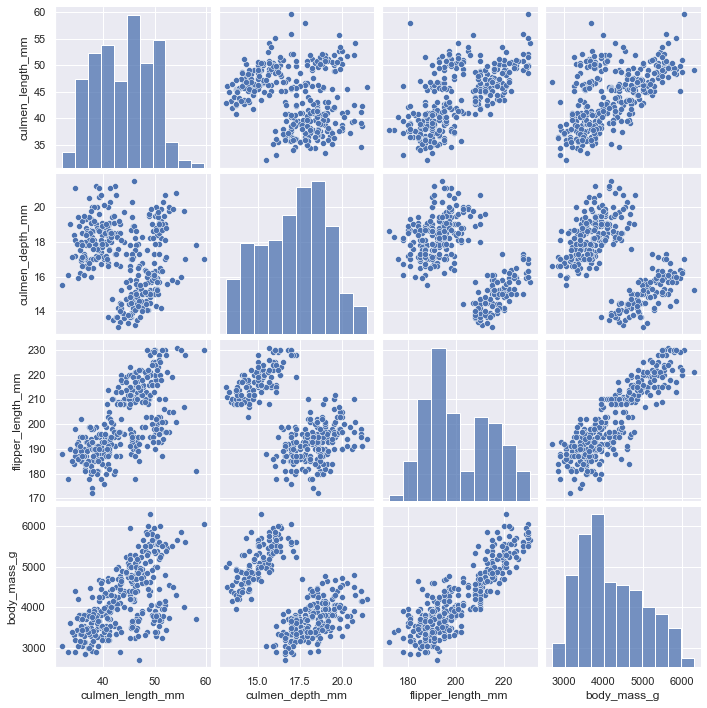

In [36]:
sns.pairplot(data)

In [39]:
data.loc[0]

species_short           Adelie
island               Torgersen
culmen_length_mm          39.1
culmen_depth_mm           18.7
flipper_length_mm          181
body_mass_g               3750
sex                       MALE
Name: 0, dtype: object

In [40]:
# description of all the data
with pd.option_context('display.max_columns', 334):
    print(data.describe(include='all'))

       species_short  island  culmen_length_mm  culmen_depth_mm  \
count            334     334        334.000000       334.000000   
unique             3       3               NaN              NaN   
top           Adelie  Biscoe               NaN              NaN   
freq             146     164               NaN              NaN   
mean             NaN     NaN         43.994311        17.160479   
std              NaN     NaN          5.460521         1.967909   
min              NaN     NaN         32.100000        13.100000   
25%              NaN     NaN         39.500000        15.600000   
50%              NaN     NaN         44.500000        17.300000   
75%              NaN     NaN         48.575000        18.700000   
max              NaN     NaN         59.600000        21.500000   

        flipper_length_mm  body_mass_g   sex  
count          334.000000   334.000000   334  
unique                NaN          NaN     3  
top                   NaN          NaN  MALE  
freq   

<AxesSubplot:>

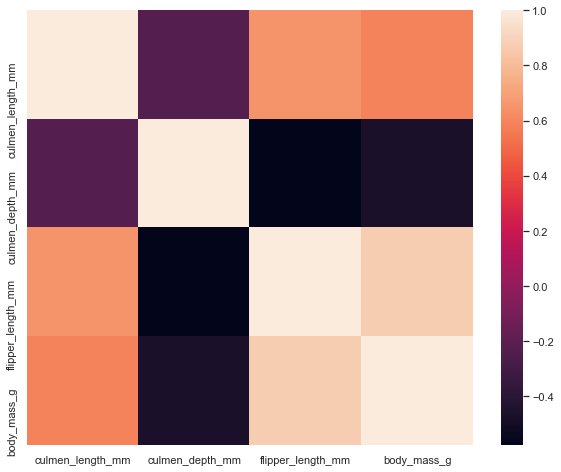

In [41]:
sns.heatmap(data.corr())

#### 3. Create a new dataset where you scale all numeric values with the standardscaler.

In [58]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data.set_index('species_short', 'island', 'sex', inplace=True)

In [50]:
data.set_index('island', inplace=True)

In [52]:
data.set_index('sex', inplace=True)

In [53]:
data.iloc[0]

culmen_length_mm       39.1
culmen_depth_mm        18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: MALE, dtype: float64

In [54]:
# description of all the data
with pd.option_context('display.max_columns', 334):
    print(data.describe(include='all'))

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [57]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02
mean,-4.254747e-17,-5.531171e-16,8.934969e-16,-1.276424e-16
std,1.001500e+00,1.001500e+00,1.001500e+00,1.001500e+00
min,-2.181505e+00,-2.066442e+00,-2.072325e+00,-1.877800e+00
25%,-8.242902e-01,-7.941526e-01,-7.867179e-01,-8.200995e-01
50%,9.274707e-02,7.100443e-02,-2.867596e-01,-1.979229e-01
75%,8.401325e-01,7.834867e-01,8.560021e-01,7.275647e-01
max,2.862200e+00,2.208451e+00,2.141609e+00,2.601872e+00


In [59]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


#### 4. Perform a PCA analysis

In [61]:
from sklearn.decomposition import PCA

In [62]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [63]:
# Fitr the model
model.fit(data_scaled)

PCA()

In [64]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

In [65]:
data_reduced

array([[-1.85848815,  0.03167633, -0.23450962,  0.52866841],
       [-1.32072197, -0.44347275, -0.02582268,  0.40227325],
       [-1.3816875 , -0.16108641,  0.1899857 , -0.52849341],
       ...,
       [ 2.74811252,  0.26970751, -0.41723378,  0.23854016],
       [ 1.71059971, -0.72411071, -0.25915367,  0.33225994],
       [ 2.01503039,  0.33995817, -0.15336314,  0.44041568]])

#### 5. Investigate the explained variance of the components... do we see an 'elbow'?

<AxesSubplot:>

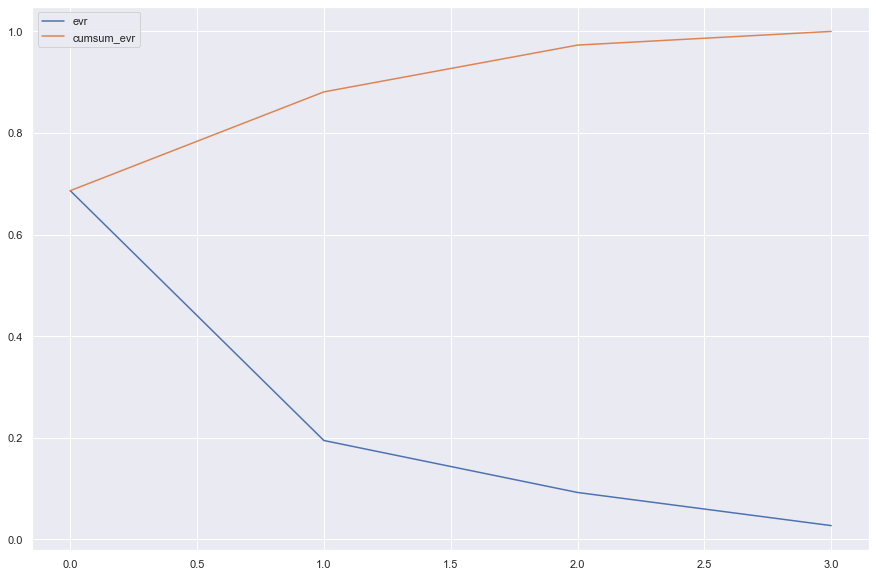

In [68]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

#### 6. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?

In [69]:
np.set_printoptions(precision=None, suppress=True) # Removes scientific notation from numpy

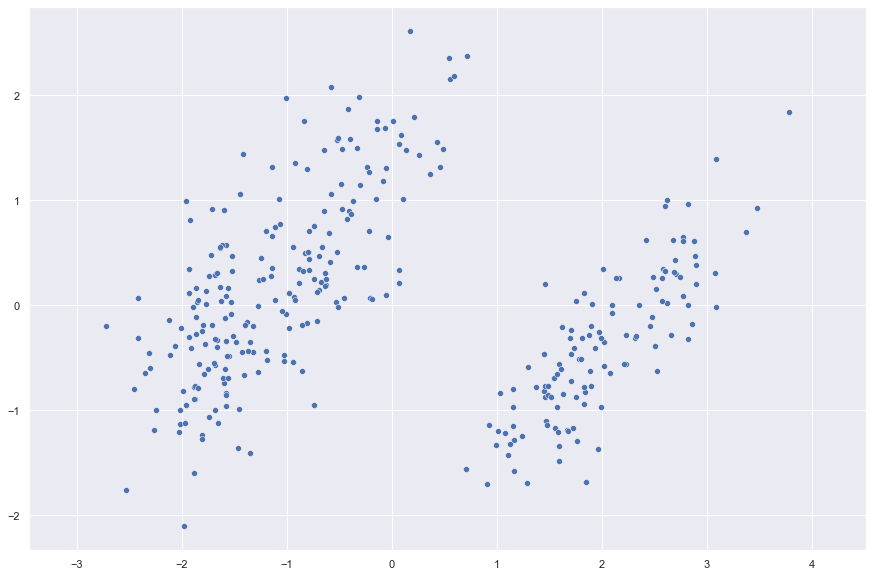

In [70]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

<AxesSubplot:>

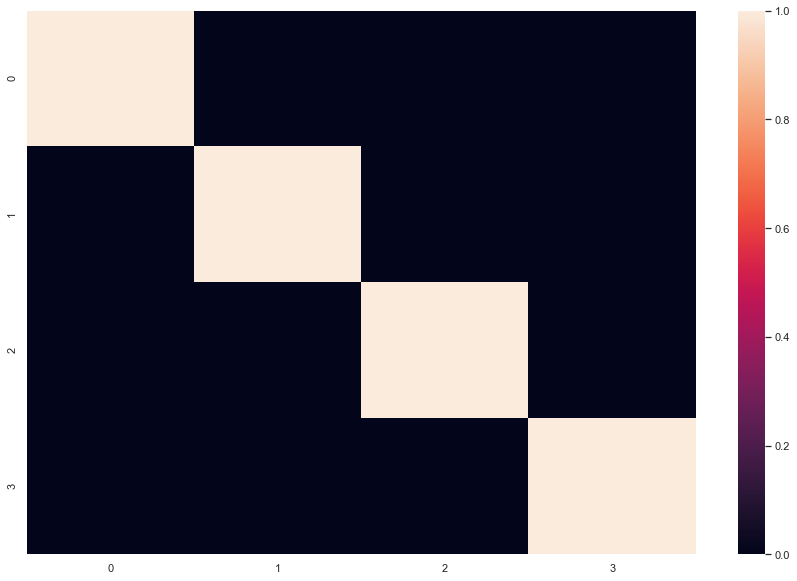

In [71]:
# Correlation of the components
sns.heatmap(pd.DataFrame(data_reduced).corr())

In [72]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

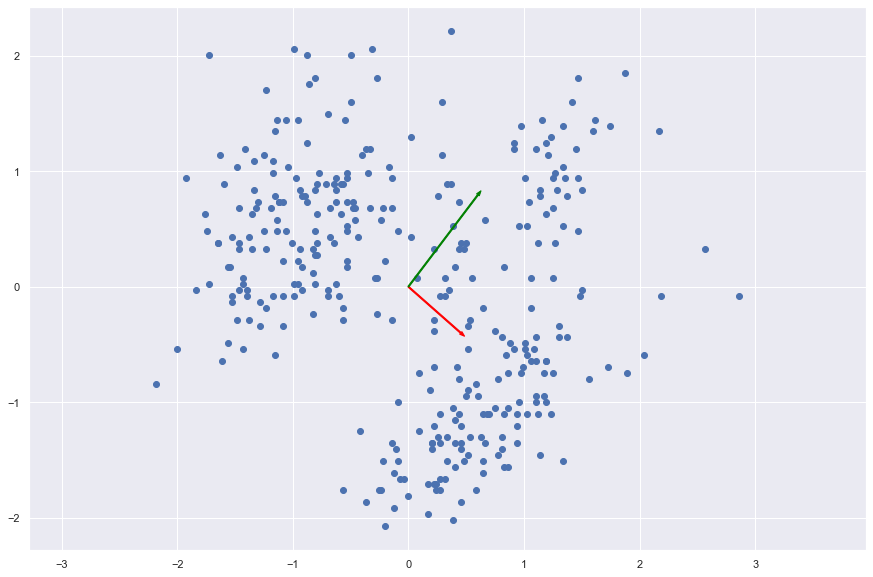

In [73]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

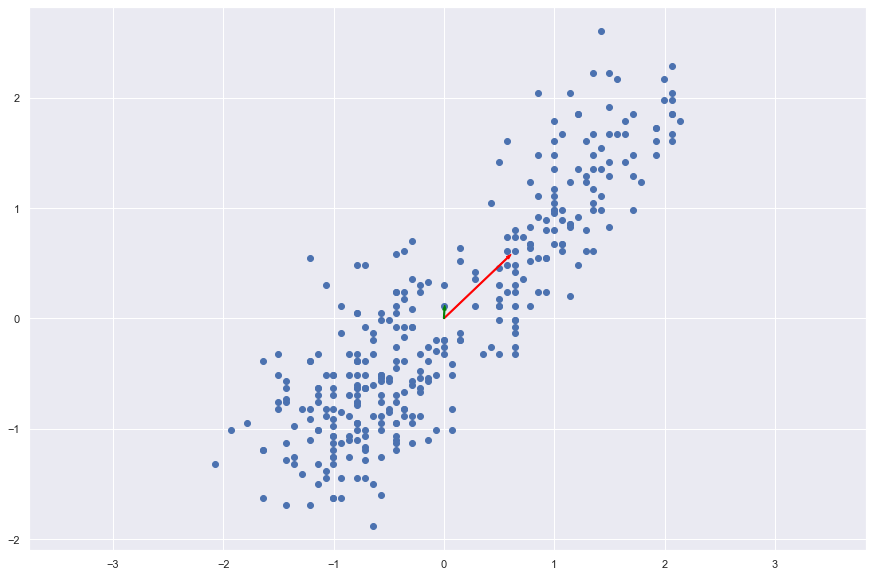

In [74]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [75]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

#### 7. Inspect the correlation between the components. Which variables are they mostly associated with?

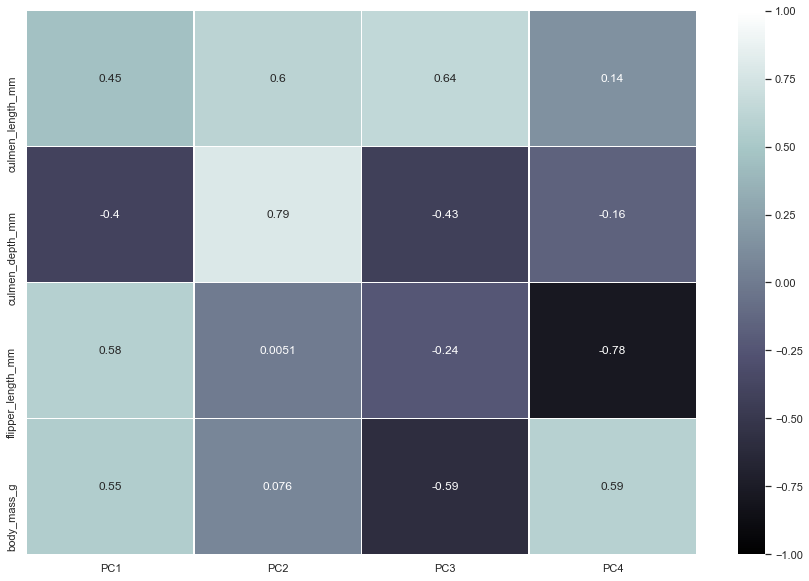

In [76]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. 

1.   List item
2.   List item

Can we explain what is going on?

#### Clustering solution by Elisabeth Grønhøj

In [ ]:
# importing relevant packages
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv')

In [27]:
print(df.isnull())

         v7     v9    v10    v14    v56    v57    v58    v59    v60    v61  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False   True  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1018  False  False  False  False  False  False  False  False  False  False   
1019  False  False  False  False  False  False  False  False  False  False   
1020  False  False   True  False  False  False  False  False  False  False   
1021  False  False  False  False  False  False  False  False  False  False   
1022  False  False   True  False  False  False  False  False  False  False   

      ...   v261   v262   v263   v264   v265   v266   v267   v2

In the following I will do so inspection of the data set

In [ ]:
df.head(10)

In [ ]:
# AS we can see above there is used some other signs as missings. We therefore execlude missings in the following:

missing_values = ["n/a", "na", "--", "."]
df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv', 
                   na_values = missing_values)
print(df.isnull())

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

In [ ]:
df['v9'].unique()

### Ward clustering

In [ ]:
X = df[['v7', 'v9', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]

X_1 = df[['v7', 'v9', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]


linked = linkage(X, 'ward') #make a dataframe x where wards algoritm is used

# x and x_1 are the sames

In [ ]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20, #only show me 20 cluster
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [12]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [13]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [14]:
# You solutions from here...